# Importing Requierments:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
import joblib

# Papers Pre-processing:
1. Removing numbers & punctuations.
2. Removing non-Arabic characters.
3. Removing diacritics
4. Removing Stop-words.

# Data Overview - SMOTE:

In [ ]:
articles = joblib.load("article_clean_dataframe.pkl")
articles.head()

In [ ]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Article_ID               1011 non-null   int64  
 1   folder                   1011 non-null   object 
 2   ar_en                    1011 non-null   object 
 3   Country                  1011 non-null   object 
 4   Title                    1011 non-null   object 
 5   Author                   1011 non-null   object 
 6   Author_certificate       1011 non-null   object 
 7   Author_specification     1011 non-null   object 
 8   work                     1004 non-null   object 
 9   co_Author                840 non-null    object 
 10  Email                    904 non-null    object 
 11  contact                  906 non-null    object 
 12  Scop                     1011 non-null   object 
 13  scop_specific            832 non-null    object 
 14  Received_date           

In [ ]:
articles.Scop.value_counts() # normalize =True

موارد           157
وقاية نبات      153
محاصيل حقلية    124
بستنة           123
إنتاج حيواني    116
اقتصاد زراعي    108
بيئة وحراج      101
أغذية            77
تقانات حيوية     52
Name: Scop, dtype: int64

In [ ]:
category_labels = articles.Scop.unique()
label_dict = {}
for index, label in enumerate(category_labels):
    label_dict[label] = index
label_dict

{'محاصيل حقلية': 0,
 'وقاية نبات': 1,
 'بستنة': 2,
 'موارد': 3,
 'تقانات حيوية': 4,
 'إنتاج حيواني': 5,
 'أغذية': 6,
 'اقتصاد زراعي': 7,
 'بيئة وحراج': 8}

In [ ]:
articles['label'] = articles.Scop.replace(label_dict)

<AxesSubplot:xlabel='label', ylabel='count'>

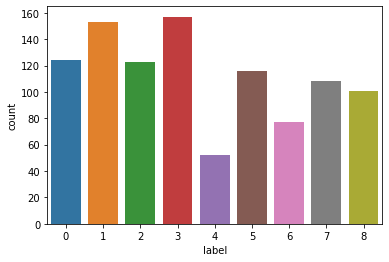

In [ ]:
sns.countplot(x='label', data= articles)


In [ ]:
articles_sub = articles.filter(items=['filtered_txt', 'label'])
articles_sub.head()

In [ ]:
# Split the data into X and y data sets
X = articles_sub.filtered_txt
y = articles_sub.label

In [ ]:
counter_vec = CountVectorizer(max_features=5000, min_df=5, max_df=0.7)
X_cv = counter_vec.fit_transform(X)
X_cv.shape
# print(X_cv.toarray().shape)

(1011, 5000)

In [ ]:
pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(sampling_strategy='all')
X_smote, y_smote = smote.fit_resample(X_cv,y)
y_smote.value_counts()

0    157
1    157
2    157
3    157
4    157
5    157
6    157
7    157
8    157
Name: label, dtype: int64

In [ ]:
# Split the data into training and test sets
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42, stratify=y_smote)

In [ ]:
# Number of articles in the training set
X_train_cv.shape, y_train_cv.shape

((989, 5000), (989,))

In [ ]:
# Number of articles in the test set
X_test_cv.shape, y_test_cv.shape

((424, 5000), (424,))

In [ ]:
# The second document-term matrix has both unigrams and bigrams, and indicators instead of counts
bigram = CountVectorizer(ngram_range=(1,2), max_features=5000, min_df=5, max_df=0.7)

X_bigram = bigram.fit_transform(X)
X_bigram.shape

(1011, 5000)

In [ ]:
X_smote_bigram, y_smote_bigram = smote.fit_resample(X_bigram,y)
y_smote_bigram.value_counts()

0    157
1    157
2    157
3    157
4    157
5    157
6    157
7    157
8    157
Name: label, dtype: int64

In [ ]:
X_train_cv_bigram, X_test_cv_bigram, y_train_cv_bigram, y_test_cv_bigram = train_test_split(X_smote_bigram, y_smote_bigram, test_size=0.3, random_state=42, stratify=y_smote_bigram)

In [ ]:
# Create TF-IDF Vectorizers
tfidf = TfidfVectorizer(max_features=5000, min_df=5, max_df=0.7)
tfidf_bigram = TfidfVectorizer(ngram_range=(1,2), binary=True, max_features=5000, min_df=5, max_df=0.7)


In [ ]:
X_tfidf = tfidf.fit_transform(X)
X_tfidf.shape

(1011, 5000)

In [ ]:
X_smote_tfidf, y_smote_tfidf = smote.fit_resample(X_tfidf,y)
y_smote_tfidf.value_counts()

0    157
1    157
2    157
3    157
4    157
5    157
6    157
7    157
8    157
Name: label, dtype: int64

In [ ]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_smote_tfidf, y_smote_tfidf, test_size=0.3, random_state=42, stratify=y_smote_tfidf)

In [ ]:
X_tfidf_bigram = tfidf_bigram.fit_transform(X)
X_tfidf_bigram.shape

(1011, 5000)

In [ ]:
X_smote_tfidf_bigram, y_smote_tfidf_bigram = smote.fit_resample(X_tfidf_bigram,y)
y_smote_tfidf_bigram.value_counts()

0    157
1    157
2    157
3    157
4    157
5    157
6    157
7    157
8    157
Name: label, dtype: int64

In [ ]:
X_train_tfidf_bigram, X_test_tfidf_bigram, y_train_tfidf_bigram, y_test_tfidf_bigram = train_test_split(X_smote_tfidf_bigram, y_smote_tfidf_bigram, test_size=0.3, random_state=42, stratify=y_smote_tfidf_bigram)

# Classification Models:

In [ ]:
# Create a function to calculate the error metrics

def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['أغذية', 'إنتاج حيواني', 'اقتصاد زراعي', 'بستنة', 'بيئة وحراج', 'تقانات حيوية','محاصيل حقلية', 'موارد', 'وقاية نبات'], 
                yticklabels=['أغذية', 'إنتاج حيواني', 'اقتصاد زراعي', 'بستنة', 'بيئة وحراج', 'تقانات حيوية','محاصيل حقلية', 'موارد', 'وقاية نبات'], annot=True,
                fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");  

    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    
    true_pos, false_neg, false_pos, true_neg =[], [], [], []
    total = 0
    for i in range(9):
        TP, FN, FP = 0, 0, 0
        for j in range(9):
            total += cm[i][j]
            if(i == j):
                true_pos.append(cm[i][j])
                TP = cm[i][j]
            else:
                FN += cm[i][j]
                FP += cm[j][i]
        false_neg.append(FN)
        false_pos.append(FP)
        true_neg.append(TP + FN + FP)

        TP_count = 0
    percision, recall, specificity, F1_score = [], [], [], []

    for num in range(9):
        true_neg[num] = total - true_neg[num]
        TP_count += true_pos[num]
        percision.append(true_pos[num]/(true_pos[num] + false_pos[num]))
        recall.append(true_pos[num]/(true_pos[num] + false_neg[num]))
        specificity.append(true_neg[num]/(true_neg[num] + false_pos[num]))
        F1_score.append(2 * (percision[num] * recall[num]) / (percision[num] + recall[num]))

    total_accuracy = TP_count/total
    total_percision = np.mean(percision)
    total_recall = np.mean(recall)
#     total_specificity = np.mean(specificity)
    total_F1_score = np.mean(F1_score)
    # precision = TP / (TP+FP)
    # recall = TP / (TP+FN)
    # specificity = TN / (TN+FP)
    # F1_Score = 2 * (precision * recall) / (precision + recall)
    print(' model accuracy: {}\n total percision: {}\n total recall: {}\n total F1_score: {}'.format(total_accuracy, total_percision, total_recall, total_F1_score))
    print('\n Detailed Report: \n')
    print(classification_report(actual, predicted))
    
    
    cm_results = [total_accuracy, total_percision, total_recall, total_F1_score]
    return cm_results

In [ ]:
def benchmark(clf, X_train, X_test):
    print("_" * 80)
    print("Training: {}".format(clf))
    t0 = time()
    model = clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = model.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    confusion_matrix = conf_matrix(y_test, pred)
    return (confusion_matrix)

In [ ]:
# Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=0)
# Naive Bayes model
mnb = MultinomialNB()
bnb = BernoulliNB()
# KNeighbors model
knn= KNeighborsClassifier(10)
# Decision Tree model
id3 =DecisionTreeClassifier()

________________________________________________________________________________
Training: RandomForestClassifier(random_state=0)
train time: 2.597s
test time:  0.187s
 model accuracy: 0.8726415094339622
 total percision: 0.8777562768722462
 total recall: 0.8725374310480694
 total F1_score: 0.873464767216883

 Detailed Report: 

              precision    recall  f1-score   support

           0       0.76      0.83      0.80        47
           1       0.90      0.91      0.91        47
           2       0.90      0.74      0.81        47
           3       0.72      0.81      0.76        47
           4       0.98      0.89      0.93        47
           5       0.90      0.96      0.93        47
           6       0.92      0.92      0.92        48
           7       0.98      0.91      0.95        47
           8       0.85      0.87      0.86        47

    accuracy                           0.87       424
   macro avg       0.88      0.87      0.87       424
weighted avg       

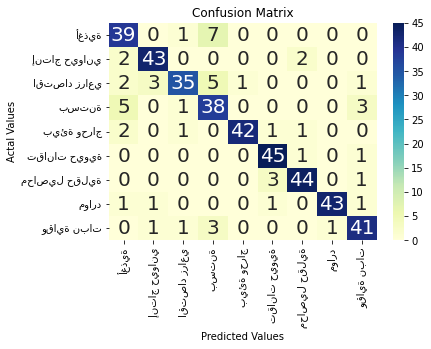

In [ ]:
cm1 = benchmark(rf, X_train_cv, X_test_cv)
print (cm1)

________________________________________________________________________________
Training: MultinomialNB()
train time: 0.107s
test time:  0.028s
 model accuracy: 0.8632075471698113
 total percision: 0.8655382849464738
 total recall: 0.8631304176516942
 total F1_score: 0.8636708572507905

 Detailed Report: 

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        47
           1       0.96      0.96      0.96        47
           2       0.80      0.77      0.78        47
           3       0.74      0.74      0.74        47
           4       0.91      0.87      0.89        47
           5       0.88      0.96      0.92        47
           6       0.96      0.90      0.92        48
           7       0.98      0.91      0.95        47
           8       0.75      0.81      0.78        47

    accuracy                           0.86       424
   macro avg       0.87      0.86      0.86       424
weighted avg       0.87      0.86      0.

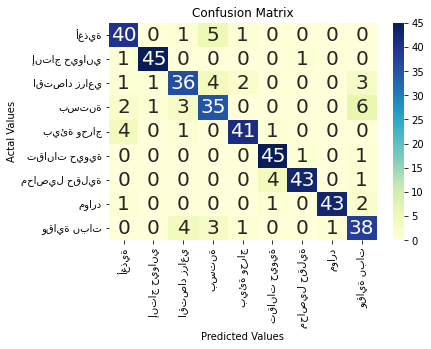

In [ ]:
cm2 = benchmark(mnb, X_train_cv, X_test_cv)
print (cm2)

________________________________________________________________________________
Training: KNeighborsClassifier(n_neighbors=10)
train time: 0.010s
test time:  0.596s
 model accuracy: 0.6438679245283019
 total percision: 0.7015077467567296
 total recall: 0.6437155240346731
 total F1_score: 0.649805420318391

 Detailed Report: 

              precision    recall  f1-score   support

           0       0.71      0.57      0.64        47
           1       0.39      0.85      0.54        47
           2       0.57      0.53      0.55        47
           3       0.86      0.53      0.66        47
           4       0.66      0.79      0.72        47
           5       0.79      0.57      0.67        47
           6       0.65      0.71      0.68        48
           7       0.86      0.77      0.81        47
           8       0.81      0.47      0.59        47

    accuracy                           0.64       424
   macro avg       0.70      0.64      0.65       424
weighted avg       0.

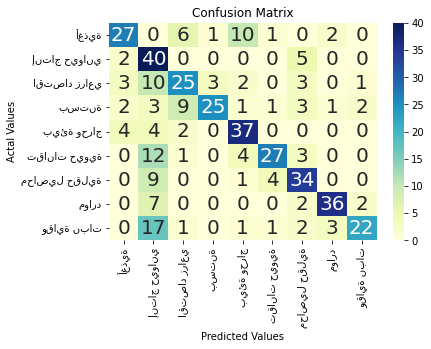

In [ ]:
cm3 = benchmark(knn, X_train_cv, X_test_cv)
print (cm3)

________________________________________________________________________________
Training: DecisionTreeClassifier()
train time: 0.931s
test time:  0.005s
 model accuracy: 0.6768867924528302
 total percision: 0.6867904169708055
 total recall: 0.6766646966115051
 total F1_score: 0.6784622828889706

 Detailed Report: 

              precision    recall  f1-score   support

           0       0.65      0.70      0.67        47
           1       0.73      0.57      0.64        47
           2       0.48      0.47      0.47        47
           3       0.59      0.70      0.64        47
           4       0.69      0.74      0.71        47
           5       0.79      0.66      0.72        47
           6       0.79      0.77      0.78        48
           7       0.90      0.81      0.85        47
           8       0.56      0.66      0.61        47

    accuracy                           0.68       424
   macro avg       0.69      0.68      0.68       424
weighted avg       0.69      0.6

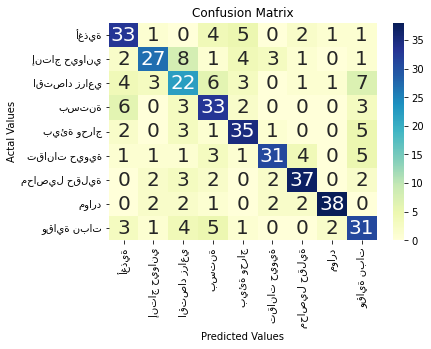

In [ ]:
cm4 = benchmark(id3, X_train_cv, X_test_cv)
print (cm4)

________________________________________________________________________________
Training: RandomForestClassifier(random_state=0)
train time: 2.163s
test time:  0.172s
 model accuracy: 0.8891509433962265
 total percision: 0.8944246587523899
 total recall: 0.8890858944050434
 total F1_score: 0.8895936910182688

 Detailed Report: 

              precision    recall  f1-score   support

           0       0.82      0.87      0.85        47
           1       0.90      0.94      0.92        47
           2       0.93      0.79      0.85        47
           3       0.76      0.83      0.80        47
           4       1.00      0.83      0.91        47
           5       0.88      0.96      0.92        47
           6       0.92      0.92      0.92        48
           7       1.00      0.96      0.98        47
           8       0.84      0.91      0.88        47

    accuracy                           0.89       424
   macro avg       0.89      0.89      0.89       424
weighted avg      

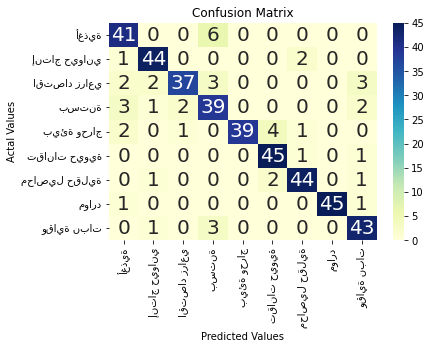

In [ ]:
cm5 = benchmark(rf, X_train_cv_bigram, X_test_cv_bigram)
print (cm5)

________________________________________________________________________________
Training: BernoulliNB()
train time: 0.045s
test time:  0.031s
 model accuracy: 0.8183962264150944
 total percision: 0.8313914168462188
 total recall: 0.8183116627265563
 total F1_score: 0.820186505793867

 Detailed Report: 

              precision    recall  f1-score   support

           0       0.84      0.77      0.80        47
           1       0.89      0.83      0.86        47
           2       0.86      0.68      0.76        47
           3       0.70      0.74      0.72        47
           4       0.93      0.81      0.86        47
           5       0.70      0.89      0.79        47
           6       0.87      0.85      0.86        48
           7       1.00      0.91      0.96        47
           8       0.69      0.87      0.77        47

    accuracy                           0.82       424
   macro avg       0.83      0.82      0.82       424
weighted avg       0.83      0.82      0.82 

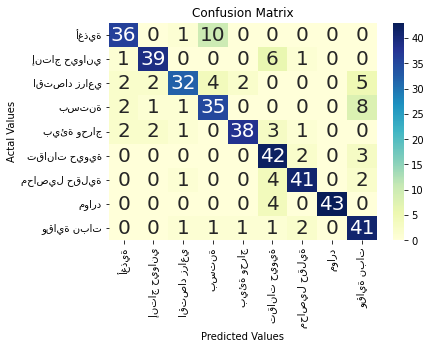

In [ ]:
cm6 = benchmark(bnb, X_train_cv_bigram, X_test_cv_bigram)
print (cm6)

________________________________________________________________________________
Training: KNeighborsClassifier(n_neighbors=10)
train time: 0.016s
test time:  0.496s
 model accuracy: 0.6674528301886793
 total percision: 0.7328348576719327
 total recall: 0.667503940110323
 total F1_score: 0.6706591117798208

 Detailed Report: 

              precision    recall  f1-score   support

           0       0.77      0.64      0.70        47
           1       0.78      0.74      0.76        47
           2       0.72      0.49      0.58        47
           3       0.88      0.49      0.63        47
           4       0.71      0.89      0.79        47
           5       0.95      0.74      0.83        47
           6       0.69      0.65      0.67        48
           7       0.39      0.96      0.56        47
           8       0.70      0.40      0.51        47

    accuracy                           0.67       424
   macro avg       0.73      0.67      0.67       424
weighted avg       0.

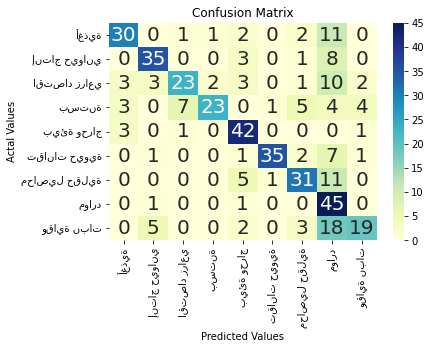

In [ ]:
cm7 = benchmark(knn, X_train_cv_bigram, X_test_cv_bigram)
print (cm7)

________________________________________________________________________________
Training: DecisionTreeClassifier()
train time: 1.089s
test time:  0.007s
 model accuracy: 0.6816037735849056
 total percision: 0.6881629136039296
 total recall: 0.6810973207249803
 total F1_score: 0.6815066056538925

 Detailed Report: 

              precision    recall  f1-score   support

           0       0.63      0.57      0.60        47
           1       0.72      0.81      0.76        47
           2       0.61      0.57      0.59        47
           3       0.50      0.55      0.53        47
           4       0.82      0.68      0.74        47
           5       0.73      0.77      0.75        47
           6       0.75      0.90      0.82        48
           7       0.89      0.72      0.80        47
           8       0.53      0.55      0.54        47

    accuracy                           0.68       424
   macro avg       0.69      0.68      0.68       424
weighted avg       0.69      0.6

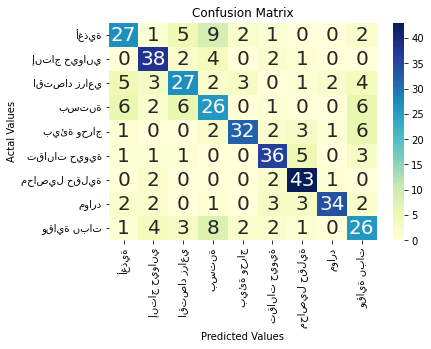

In [ ]:
cm8 = benchmark(id3, X_train_cv_bigram, X_test_cv_bigram)
print (cm8)

________________________________________________________________________________
Training: RandomForestClassifier(random_state=0)
train time: 2.563s
test time:  0.161s
 model accuracy: 0.8726415094339622
 total percision: 0.8767030544758718
 total recall: 0.8726851851851851
 total F1_score: 0.8728041436992352

 Detailed Report: 

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        47
           1       0.92      0.94      0.93        47
           2       0.83      0.72      0.77        47
           3       0.74      0.89      0.81        47
           4       0.91      0.85      0.88        47
           5       0.88      0.96      0.92        47
           6       0.95      0.85      0.90        48
           7       0.98      0.94      0.96        47
           8       0.87      0.87      0.87        47

    accuracy                           0.87       424
   macro avg       0.88      0.87      0.87       424
weighted avg      

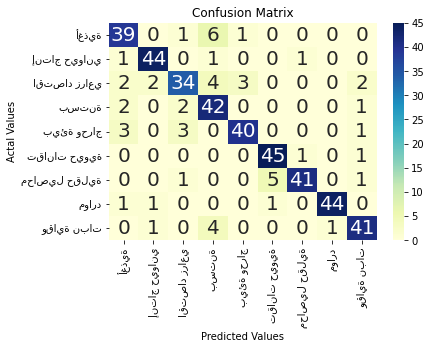

In [ ]:
cm9 = benchmark(rf, X_train_tfidf, X_test_tfidf)
print (cm9)

________________________________________________________________________________
Training: MultinomialNB()
train time: 0.021s
test time:  0.005s
 model accuracy: 0.8584905660377359
 total percision: 0.862007926980477
 total recall: 0.8583037825059102
 total F1_score: 0.8583247195502222

 Detailed Report: 

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        47
           1       0.95      0.87      0.91        47
           2       0.85      0.70      0.77        47
           3       0.72      0.83      0.77        47
           4       0.87      0.87      0.87        47
           5       0.92      0.96      0.94        47
           6       0.92      0.94      0.93        48
           7       0.92      0.94      0.93        47
           8       0.86      0.79      0.82        47

    accuracy                           0.86       424
   macro avg       0.86      0.86      0.86       424
weighted avg       0.86      0.86      0.8

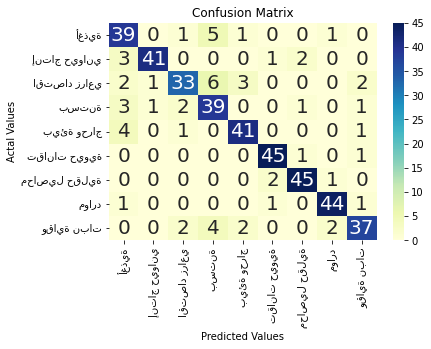

In [ ]:
cm10 = benchmark(mnb, X_train_tfidf, X_test_tfidf)
print (cm10)

________________________________________________________________________________
Training: KNeighborsClassifier(n_neighbors=10)
train time: 0.012s
test time:  0.403s
 model accuracy: 0.7570754716981132
 total percision: 0.7985591487691366
 total recall: 0.7568459416863672
 total F1_score: 0.7562164005345635

 Detailed Report: 

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        47
           1       0.96      0.53      0.68        47
           2       0.72      0.70      0.71        47
           3       0.85      0.47      0.60        47
           4       0.51      0.96      0.66        47
           5       0.95      0.89      0.92        47
           6       0.75      0.85      0.80        48
           7       0.89      0.85      0.87        47
           8       0.77      0.70      0.73        47

    accuracy                           0.76       424
   macro avg       0.80      0.76      0.76       424
weighted avg       0

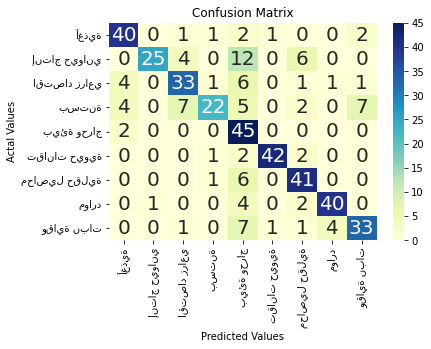

In [ ]:
cm11 = benchmark(knn, X_train_tfidf, X_test_tfidf)
print (cm11)

________________________________________________________________________________
Training: DecisionTreeClassifier()
train time: 1.493s
test time:  0.016s
 model accuracy: 0.6792452830188679
 total percision: 0.6930803475750719
 total recall: 0.679225768321513
 total F1_score: 0.6822442894253803

 Detailed Report: 

              precision    recall  f1-score   support

           0       0.56      0.66      0.61        47
           1       0.68      0.57      0.62        47
           2       0.63      0.57      0.60        47
           3       0.56      0.72      0.63        47
           4       0.82      0.77      0.79        47
           5       0.67      0.70      0.69        47
           6       0.79      0.69      0.73        48
           7       0.92      0.74      0.82        47
           8       0.62      0.68      0.65        47

    accuracy                           0.68       424
   macro avg       0.69      0.68      0.68       424
weighted avg       0.69      0.68

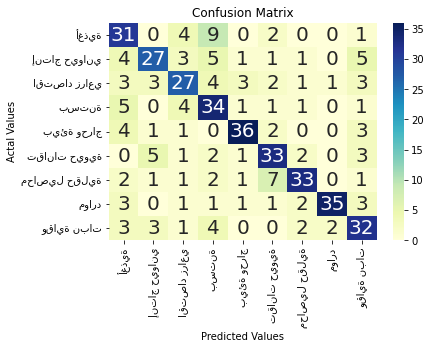

In [ ]:
cm12 = benchmark(id3, X_train_tfidf, X_test_tfidf)
print (cm12)

________________________________________________________________________________
Training: RandomForestClassifier(random_state=0)
train time: 2.867s
test time:  0.172s
 model accuracy: 0.8702830188679245
 total percision: 0.8775179019279888
 total recall: 0.8703211189913318
 total F1_score: 0.8711772979549548

 Detailed Report: 

              precision    recall  f1-score   support

           0       0.78      0.83      0.80        47
           1       0.85      0.94      0.89        47
           2       0.95      0.74      0.83        47
           3       0.72      0.81      0.76        47
           4       0.98      0.91      0.95        47
           5       0.86      0.94      0.90        47
           6       0.93      0.85      0.89        48
           7       0.98      0.89      0.93        47
           8       0.86      0.91      0.89        47

    accuracy                           0.87       424
   macro avg       0.88      0.87      0.87       424
weighted avg      

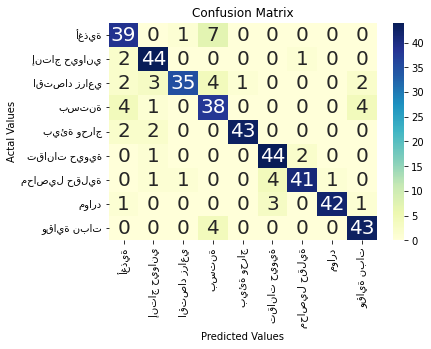

In [ ]:
cm13 = benchmark(rf, X_train_tfidf_bigram, X_test_tfidf_bigram)
print (cm13)

________________________________________________________________________________
Training: BernoulliNB()
train time: 0.052s
test time:  0.018s
 model accuracy: 0.7971698113207547
 total percision: 0.8254506514286886
 total recall: 0.7972813238770686
 total F1_score: 0.8009460306234755

 Detailed Report: 

              precision    recall  f1-score   support

           0       0.82      0.79      0.80        47
           1       0.68      0.89      0.77        47
           2       0.89      0.83      0.86        47
           3       0.71      0.68      0.70        47
           4       1.00      0.68      0.81        47
           5       0.61      0.91      0.74        47
           6       0.97      0.75      0.85        48
           7       1.00      0.89      0.94        47
           8       0.74      0.74      0.74        47

    accuracy                           0.80       424
   macro avg       0.83      0.80      0.80       424
weighted avg       0.83      0.80      0.80

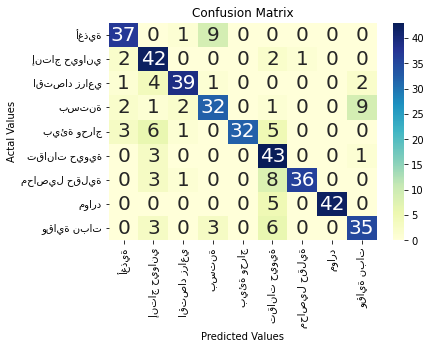

In [ ]:
cm14 = benchmark(bnb, X_train_tfidf_bigram, X_test_tfidf_bigram)
print (cm14)

________________________________________________________________________________
Training: KNeighborsClassifier(n_neighbors=10)
train time: 0.020s
test time:  0.474s


C:\Users\User\AppData\Local\Temp/ipykernel_1676/2803247665.py:38: RuntimeWarning: invalid value encountered in longlong_scalars
  percision.append(true_pos[num]/(true_pos[num] + false_pos[num]))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels w

 model accuracy: 0.6698113207547169
 total percision: nan
 total recall: 0.6692769897557133
 total F1_score: nan

 Detailed Report: 

              precision    recall  f1-score   support

           0       0.57      0.91      0.70        47
           1       1.00      0.06      0.12        47
           2       0.68      0.85      0.75        47
           3       0.00      0.00      0.00        47
           4       0.51      0.94      0.66        47
           5       0.90      0.74      0.81        47
           6       0.63      0.90      0.74        48
           7       0.93      0.89      0.91        47
           8       0.69      0.72      0.71        47

    accuracy                           0.67       424
   macro avg       0.66      0.67      0.60       424
weighted avg       0.66      0.67      0.60       424

[0.6698113207547169, nan, 0.6692769897557133, nan]


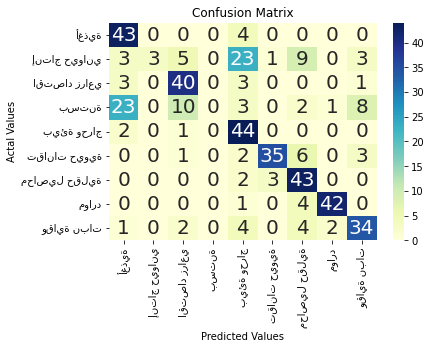

In [ ]:
cm15 = benchmark(knn, X_train_tfidf_bigram, X_test_tfidf_bigram)
print (cm15)

________________________________________________________________________________
Training: DecisionTreeClassifier()
train time: 1.843s
test time:  0.016s
 model accuracy: 0.6391509433962265
 total percision: 0.6474664070546438
 total recall: 0.6391351457840819
 total F1_score: 0.6402133380231319

 Detailed Report: 

              precision    recall  f1-score   support

           0       0.70      0.60      0.64        47
           1       0.57      0.53      0.55        47
           2       0.55      0.55      0.55        47
           3       0.56      0.62      0.59        47
           4       0.73      0.64      0.68        47
           5       0.68      0.72      0.70        47
           6       0.78      0.65      0.70        48
           7       0.73      0.74      0.74        47
           8       0.53      0.70      0.61        47

    accuracy                           0.64       424
   macro avg       0.65      0.64      0.64       424
weighted avg       0.65      0.6

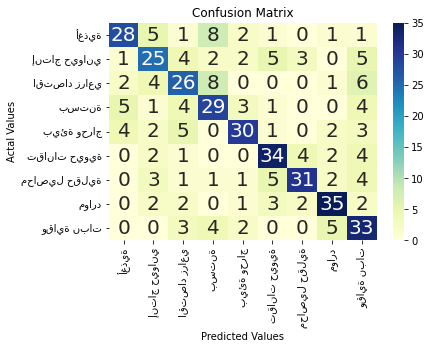

In [ ]:
cm16 = benchmark(id3, X_train_tfidf_bigram, X_test_tfidf_bigram)
print (cm16)

In [ ]:
# Compile all of the error metrics into a dataframe for comparison
results_all = pd.DataFrame(list(zip(cm1, cm2, cm3, cm4, cm5, cm6, cm7, cm8, cm9, cm10, cm11, cm12, cm13, cm14, cm15, cm16)))
results_all = results_all.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_all.columns = ['RF_cv','NB_cv', 'knn_cv', 'id3-cv', 'RF_bigram','NB_bigram', 'knn_bigram', 'id3-bigram',
                       'RF_tfidf','NB_tfidf', 'knn_tfidf', 'id3-tfidf', 'RF_bigram_tfidf','NB_bigram_tfidf', 'knn_bigram_tfidf', 'id3-bigram_tfidf']
results_all

,RF_cv,NB_cv,knn_cv,id3-cv,RF_bigram,NB_bigram,knn_bigram,id3-bigram,RF_tfidf,NB_tfidf,knn_tfidf,id3-tfidf,RF_bigram_tfidf,NB_bigram_tfidf,knn_bigram_tfidf,id3-bigram_tfidf
Accuracy,0.872642,0.863208,0.643868,0.676887,0.889151,0.818396,0.667453,0.681604,0.872642,0.858491,0.757075,0.679245,0.870283,0.797170,0.669811,0.639151
Precision,0.877756,0.865538,0.701508,0.686790,0.894425,0.831391,0.732835,0.688163,0.876703,0.862008,0.798559,0.693080,0.877518,0.825451,NaN,0.647466
Recall,0.872537,0.863130,0.643716,0.676665,0.889086,0.818312,0.667504,0.681097,0.872685,0.858304,0.756846,0.679226,0.870321,0.797281,0.669277,0.639135
F1 Score,0.873465,0.863671,0.649805,0.678462,0.889594,0.820187,0.670659,0.681507,0.872804,0.858325,0.756216,0.682244,0.871177,0.800946,NaN,0.640213
